In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [65]:
#ring crossover
#A simple two-module problem
import numpy as np

class GeneticAlgorithm:
    def __init__(self, population_size, gene_length, mutation_rate, num_generations):
        self.population_size = population_size
        self.gene_length = gene_length
        self.mutation_rate = mutation_rate
        self.num_generations = num_generations

    def initialize_population(self):
        return np.random.randint(0, 2, size=(self.population_size, self.gene_length))

    def generate_R_values(self):#初始化一次
        R_values = np.random.uniform(0.5, 1.0,(self.gene_length,self.gene_length))#初始化R（i，j）
        return R_values


    def fitness_function(self,R_values,genotype):#计算fintness
        n = len(genotype) // 2
        left_gene = genotype[:n]
        right_gene = genotype[n:]

        i=sum(left_gene)
        j=sum(right_gene)
  
        fitness=R_values[i-1,j-1] *  (np.float64(2) ** i + np.float64(2) ** j)
        
        
        if fitness < 0:
            print(i,j,R_values[i-1,j-1])
            print(fitness)
        return fitness
    
    def calculate_fitness(self, R_values,population):
        # 计算种群中每个个体的适应度
        fitness_scores = np.zeros(self.population_size)
        for i in range(self.population_size):

            fitness_scores[i] = self.fitness_function(R_values,population[i])
        return fitness_scores

    def selection(self, population, fitness_scores):
        # 使用适应度比例选择
        probabilities = fitness_scores / np.sum(fitness_scores)
#         print(fitness_scores)
#         print(probabilities)
        selected_indices = np.random.choice(np.arange(self.population_size), size=self.population_size, p=fitness_scores / np.sum(fitness_scores))
        return population[selected_indices]

    
    def crossover(self,parent1, parent2):
#         print('parent:')
#         print(parent1,parent2)
        # 将父代的染色体串联成一个环

        combined_chromosome=np.concatenate((parent1[:], parent2[::-1]))
#         print(combined_chromosome)

        # 随机选择切割点
        cutting_point = random.randint(0, len(combined_chromosome) - 1)

        # 生成子代
        child1 = []
        child2 = []

        # 从切割点开始顺时针方向生成第一个子代
        for i in range(cutting_point, cutting_point + len(parent1)):
            child1.append(combined_chromosome[i % len(combined_chromosome)])

        # 从切割点开始逆时针方向生成第二个子代
        for i in range(cutting_point - 1, cutting_point - len(parent2)-1, -1):
            child2.append(combined_chromosome[i % len(combined_chromosome)])
#         print('children')
#         print(child1,child2)

        return child1, child2


    def mutation(self, genotype):
#         # 对新生成的个体进行突变
#         mutation_indices = np.random.rand(self.gene_length) < self.mutation_rate
#         mutated_genotype = np.copy(genotype)
#         mutated_genotype[mutation_indices] = 1 - mutated_genotype[mutation_indices]  # 突变为另一种可能的值
#         return mutated_genotype
        # 对个体进行突变
        mutated_genotype = np.copy(genotype)
        for i in range(self.gene_length):
            if np.random.rand() < self.mutation_rate:

                mutated_genotype[i] = 1 - mutated_genotype[i]  # 突变为另一种可能的值
        return mutated_genotype

    def run(self):
        # 初始化种群
        population = self.initialize_population()

        R_values=self.generate_R_values()
        max_fitness_generation = 0
        max_fitness = 0
        count=0 #record the generation in bigest fitness
        
        for generation in range(self.num_generations):
            # 计算适应度
            fitness_scores = self.calculate_fitness(R_values,population)

            max_fitness_in_generation = np.max(fitness_scores)
            # 检查是否已达到最优解
            if max_fitness_in_generation == 1:
                return generation + 1
            if max_fitness_in_generation > max_fitness:
                max_fitness = max_fitness_in_generation
                count=generation+1

                
            # 选择
            selected_population = self.selection(population, fitness_scores)

            # 保留最适应个体
            elite_index = np.argmax(fitness_scores)
            selected_population[0] = population[elite_index]

            # 交叉
            new_population = []
            for i in range(0, self.population_size - 1, 2):
                child1, child2 = self.crossover(selected_population[i], selected_population[i + 1])
                new_population.extend([child1, child2])

            # 突变
            for i in range(self.population_size):
                new_population[i] = self.mutation(new_population[i])

            # 更新种群
            population = np.array(new_population)

        return count
    
    def run_withoutCross(self):
        # 初始化种群
        population = self.initialize_population()
        
        R_values=self.generate_R_values()
        max_fitness_generation = 0
        max_fitness = 0
        count=0 #record the generation in bigest fitness
        
        for generation in range(self.num_generations):
            # 计算适应度
            fitness_scores = self.calculate_fitness(R_values,population)

            max_fitness_in_generation = np.max(fitness_scores)
            # 检查是否已达到最优解
            if max_fitness_in_generation == 1:
                return generation + 1
            if max_fitness_in_generation > max_fitness:
                max_fitness = max_fitness_in_generation
                count=generation+1

                
            # 选择
            selected_population = self.selection(population, fitness_scores)

            # 保留最适应个体
            elite_index = np.argmax(fitness_scores)
            selected_population[0] = population[elite_index]

            # 突变
            for i in range(self.population_size):
                selected_population[i] = self.mutation(selected_population[i])
            
            # 更新种群
            population = np.array(selected_population)

        return count

[(2.933333333333333, 1.6110727964792761), (5.733333333333333, 1.8961950204437188), (7.866666666666666, 1.4313940369055924), (8.766666666666667, 2.3760377849595646), (10.9, 2.650157228040128), (12.333333333333334, 2.342837785440744), (13.5, 3.063222703842039), (14.766666666666667, 3.5654203429921445)]
[(4.033333333333333, 1.8162843634433703), (25.733333333333334, 41.14602721473309), (101.06666666666666, 107.3644675341376), (352.93333333333334, 273.09423688943383), (118.66666666666667, 183.93247553261375), (106.8, 175.1855016832158), (90.96666666666667, 151.4308386323238), (108.3, 143.31274658359365)]


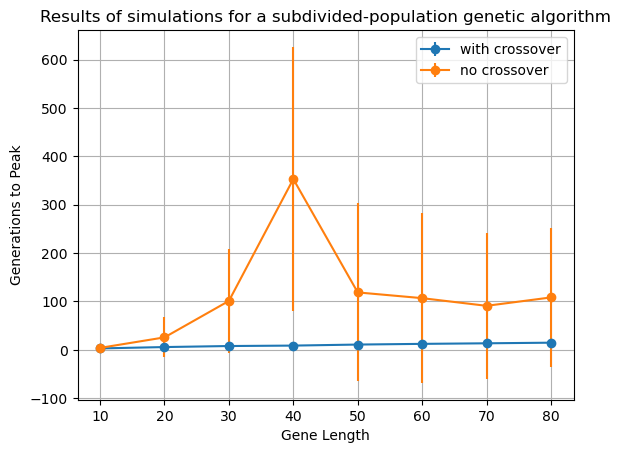

In [66]:
# 设置实验参数
population_size = 100

num_runs = 30
gene_lengths = np.arange(10, 90, 10)
num_generations_to_peak = []

num_generations_to_peak_without=[]

# 运行多次实验
for gene_length in gene_lengths:
    num_generations = []
    num_generations_without=[]
    
    n=gene_length//2
    mutation_rate = 1 / (2*n)
    for _ in range(num_runs):
        ga = GeneticAlgorithm(population_size, gene_length, mutation_rate, num_generations=1000)
        generations = ga.run()
        generations_without=ga.run_withoutCross()
        
        num_generations.append(generations)
        num_generations_without.append(generations_without)
        
    num_generations_to_peak.append((np.mean(num_generations), np.std(num_generations)))
    num_generations_to_peak_without.append((np.mean(num_generations_without), np.std(num_generations_without)))

print(num_generations_to_peak)
print(num_generations_to_peak_without)

# 绘制图像
means, stds = zip(*num_generations_to_peak)
means_without, stds_without=zip(*num_generations_to_peak_without)

plt.errorbar(gene_lengths, means, yerr=stds, label='with crossover', fmt='-o')
plt.errorbar(gene_lengths, means_without, yerr=stds_without,label='no crossover', fmt='-o')
# 添加图例
plt.legend()

plt.xlabel('Gene Length')
plt.ylabel('Generations to Peak')
plt.title('Results of simulations for a subdivided-population genetic algorithm')
plt.grid(True)
plt.show()

In [3]:
num_generations_to_peak=[(2.933333333333333, 1.6110727964792761), (5.733333333333333, 1.8961950204437188), (7.866666666666666, 1.4313940369055924), (8.766666666666667, 2.3760377849595646), (10.9, 2.650157228040128), (12.333333333333334, 2.342837785440744), (13.5, 3.063222703842039), (14.766666666666667, 3.5654203429921445)]
num_generations_to_peak_without=[(4.033333333333333, 1.8162843634433703), (25.733333333333334, 41.14602721473309), (101.06666666666666, 107.3644675341376), (352.93333333333334, 273.09423688943383), (118.66666666666667, 183.93247553261375), (106.8, 175.1855016832158), (90.96666666666667, 151.4308386323238), (108.3, 143.31274658359365)]

In [7]:
gene_lengths = np.arange(10, 90, 10)
means, stds = zip(*num_generations_to_peak)
means_without, stds_without=zip(*num_generations_to_peak_without)

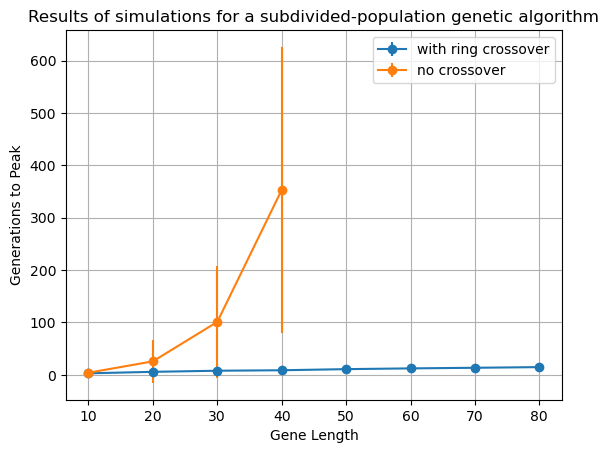

In [9]:
plt.errorbar(gene_lengths, means, yerr=stds, label='with ring crossover', fmt='-o')
plt.errorbar(gene_lengths[:4], means_without[:4], yerr=stds_without[:4],label='no crossover', fmt='-o')
# 添加图例
plt.legend()

plt.xlabel('Gene Length')
plt.ylabel('Generations to Peak')
plt.title('Results of simulations for a subdivided-population genetic algorithm')
plt.grid(True)
plt.show()

In [10]:
num_generations_to_peak_onepoint=[(2.7, 1.5088627063675035), (7.233333333333333, 3.0406505151949896), (51.13333333333333, 84.87706142153813), (94.4, 175.57004300278567), (137.93333333333334, 228.9389923587116), (108.46666666666667, 174.19198858985706), (88.93333333333334, 141.83721498801208), (113.03333333333333, 186.499416144454)]
means_onepoint, stds_onepoint = zip(*num_generations_to_peak_onepoint)

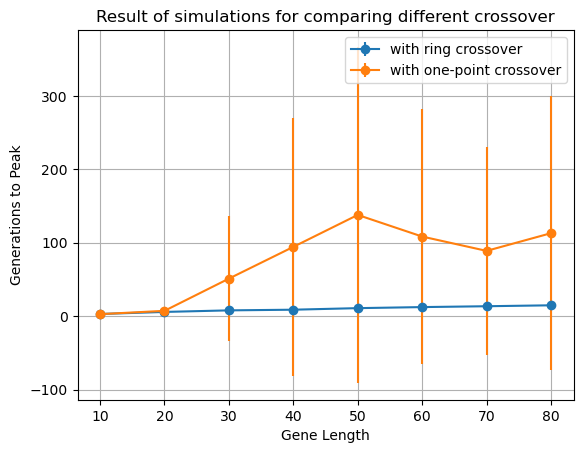

In [12]:
plt.errorbar(gene_lengths, means, yerr=stds, label='with ring crossover', fmt='-o')
plt.errorbar(gene_lengths, means_onepoint, yerr=stds_onepoint,label='with one-point crossover', fmt='-o')
# 添加图例
plt.legend()

plt.xlabel('Gene Length')
plt.ylabel('Generations to Peak')
plt.title('Result of simulations for comparing different crossover')
plt.grid(True)
plt.show()